In [5]:
#Task 1.1
import pandas as pd

# Leer el archivo csv
df = pd.read_csv('kc_house_data.csv')


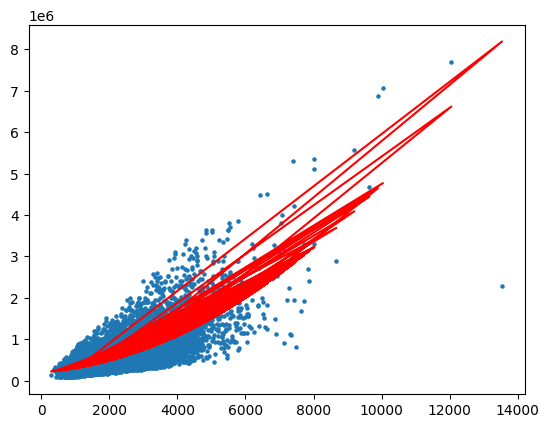

In [8]:
#Task 1.2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos en un dataframe
data = pd.read_csv('kc_house_data.csv')
x = data['sqft_living'].values
y = data['price'].values

# Ajustar el modelo polinomial de regresión lineal
coefficients = np.polyfit(x, y, 2)  # El 2 es para indicar que se ajustará una línea polinómica de segundo grado

# Mirar el modelo 
plt.scatter(x, y, s=5)
plt.plot(x, np.polyval(coefficients, x), color='r')
plt.show()

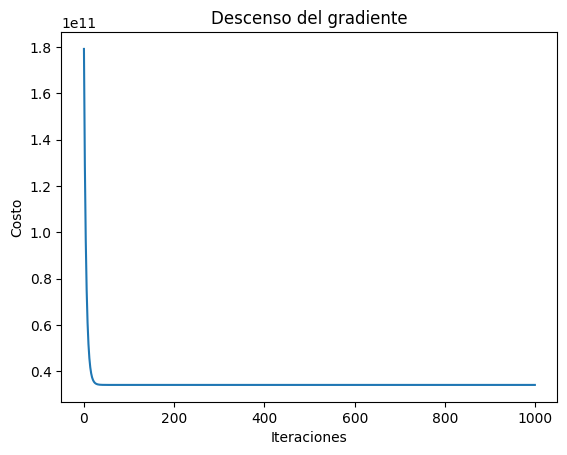

Coeficientes del modelo:
[[540088.14176653]
 [257730.19883695]]


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos en un dataframe
data = pd.read_csv('kc_house_data.csv')
x = data['sqft_living'].values.reshape(-1, 1)  # Variable predictora: pies cuadrados de espacio habitable interior
y = data['price'].values.reshape(-1, 1)  # Variable de respuesta: precio

# Normalizar los datos de entrada
x = (x - np.mean(x)) / np.std(x)

# Agregar una columna de 1's para la intercepción
X = np.hstack((np.ones((len(x), 1)), x))

# Definir las funciones para calcular la función de costo y el gradiente
def cost_function(X, y, theta):
    m = len(y)
    J = 1 / (2 * m) * np.sum((X @ theta - y) ** 2)
    return J

def gradient(X, y, theta):
    m = len(y)
    grad = 1 / m * (X.T @ (X @ theta - y))
    return grad

# Definir los parámetros del modelo y la tasa de aprendizaje
theta = np.zeros((2, 1))
alpha = 0.1
num_iters = 1000

# Ejecutar el descenso del gradiente para encontrar los coeficientes del modelo
J_history = np.zeros((num_iters, 1))
for i in range(num_iters):
    theta = theta - alpha * gradient(X, y, theta)
    J_history[i] = cost_function(X, y, theta)

# Visualizar la función de costo durante el descenso del gradiente
plt.plot(J_history)
plt.xlabel('Iteraciones')
plt.ylabel('Costo')
plt.title('Descenso del gradiente')
plt.show()

# Imprimir los coeficientes del modelo
print('Coeficientes del modelo:')
print(theta)